In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import glob
import time
import pandas as pd
# from xml.dom import minidom
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/sql_injections/sqli.csv",encoding='utf-16')

In [ ]:
df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Define SQL keywords and arithmetic keywords
sql_keywords = ["SELECT", "FROM", "WHERE", "INSERT", "INTO", "VALUES", "UPDATE", "SET", "DELETE", "JOIN", "UNION"]
arith_keywords = ["+", "-", "*", "/", "%"]

# Function to calculate TF-IDF
def calculate_tfidf(sentences):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(sentences)
    return pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Function to count special characters
def count_special_chars(sentence):
    special_chars = re.findall(r'[!@#$%^&*]', sentence)
    return len(special_chars)

# Function to check for SQL keywords
def sql_present(sentence):
    return any(keyword in sentence.upper() for keyword in sql_keywords)

# Function to check for always true conditions
def true_cond_present(sentence):
    return "1=1" in sentence or "NOT TRUE" in sentence.upper()

# Function to count number of semicolons
def num_semis(sentence):
    return sentence.count(';')

# Function to count number of comments
def num_comments(sentence):
    return len(re.findall(r'--|/\*.*?\*/', sentence))

# Function to count number of unions
def num_unions(sentence):
    return len(re.findall(r'\bUNION\b', sentence.upper()))

# Function to count number of arithmetic keywords
def num_arithematics(sentence):
    return len([char for char in sentence if char in arith_keywords])

# Function to count number of special characters (excluding spaces and newlines)
def num_special_chars(sentence):
    special_chars = re.findall(r'[!@#$%^&*()_+=|}{":?><,.\'\\\[\]`~;/-]', sentence)
    return len(special_chars)

# Function to count number of numeric characters
def num_numeric(sentence):
    return len(re.findall(r'\d', sentence))

# Function to count number of uppercase letters
def num_uppers(sentence):
    return len(re.findall(r'[A-Z]', sentence))

# Function to calculate sentence length
def sent_length(sentence):
    return len(sentence)


In [ ]:
# Replace NaN values with an empty string
df['Sentence'] = df['Sentence'].fillna('')

# Ensure all values in 'Sentence' are strings
df['Sentence'] = df['Sentence'].astype(str)

In [ ]:
df["Sentence"].describe()

count     4200
unique    3951
top          S
freq        29
Name: Sentence, dtype: object

In [ ]:
df.head()

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4200 non-null   object
 1   Label     4200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.8+ KB


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( min_df=2, max_df=0.7, stop_words=stopwords.words('english'))
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [ ]:
transformed_posts=pd.DataFrame(posts)

In [ ]:
df=pd.concat([df,transformed_posts],axis=1)

In [ ]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715
0,a,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a' --,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a' or 1 = 1; --,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,@,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply functions to DataFrame
#tfidf_df  = list(calculate_tfidf(df['Sentence']))
#df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
#df[5001] = df['Sentence'].apply(count_special_chars) #tf_chars_no
# df['5002'] = df['Sentence'].apply(sql_present) #sql_present
# df['5003'] = df['Sentence'].apply(true_cond_present) #true_cond_present
# df['5004'] = df['Sentence'].apply(sent_length) #sent_length
# df['5005'] = df['Sentence'].apply(num_semis) #num_semis
# df['5006'] = df['Sentence'].apply(num_comments) #num_comments
# df['5007'] = df['Sentence'].apply(num_unions) #num_unions
# df['5008'] = df['Sentence'].apply(num_arithematics) #num_arithematics
# df['5009'] = df['Sentence'].apply(num_special_chars) #num_special_chars
# df['5010'] = df['Sentence'].apply(num_numeric) #num_numeric
# df['5011'] = df['Sentence'].apply(num_uppers) #num_uppers

In [ ]:
df.head()

,Sentence,Label,0,1,2,3,4,5,6,7,...,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715
0,a,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a' --,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,a' or 1 = 1; --,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,@,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Columns: 4718 entries, Sentence to 4715
dtypes: int64(4717), object(1)
memory usage: 151.2+ MB


In [ ]:
X=df[df.columns[2:]]

In [ ]:
y=df['Label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       588
           1       0.98      0.77      0.87       252

    accuracy                           0.93       840
   macro avg       0.95      0.88      0.91       840
weighted avg       0.93      0.93      0.93       840



In [ ]:

print(confusion_matrix(y_test, y_pred))

[[585   3]
 [ 57 195]]


**DNN (Deep Neural Network)**

In [ ]:
from keras.models import Sequential
from keras import layers

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10,  activation='tanh'))
model.add(layers.Dense(1024, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 20)                  │          94,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │          11,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,935 (433.34 KB)

 Trainable params: 108,887 (425.34 KB)

 Non-trainable params: 2,048 (8.00 KB)

In [ ]:
classifier_nn = model.fit(X_train,y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=15)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.2494 - loss: 0.0948

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (15, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


224/224 ━━━━━━━━━━━━━━━━━━━━ 86s 378ms/step - accuracy: 0.2494 - loss: 0.0948 - val_accuracy: 0.3000 - val_loss: 0.0695
Epoch 2/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 81s 361ms/step - accuracy: 0.2478 - loss: 0.0500 - val_accuracy: 0.3000 - val_loss: 0.0650
Epoch 3/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 80s 351ms/step - accuracy: 0.2568 - loss: 0.0480 - val_accuracy: 0.3000 - val_loss: 0.0659
Epoch 4/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 77s 345ms/step - accuracy: 0.2556 - loss: 0.0462 - val_accuracy: 0.3000 - val_loss: 0.0669
Epoch 5/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.2653 - loss: 0.0478 - val_accuracy: 0.3000 - val_loss: 0.0706
Epoch 6/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.2607 - loss: 0.0472 - val_accuracy: 0.3000 - val_loss: 0.0717
Epoch 7/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 78s 348ms/step - accuracy: 0.2667 - loss: 0.0428 - val_accuracy: 0.3000 - val_loss: 0.0717
Epoch 8/30
224/224 ━━━━━━━━━━━━━━━━━━━━ 81s 344ms/step - accuracy: 0.2664 - loss: 0.0413 - val

KeyboardInterrupt: 

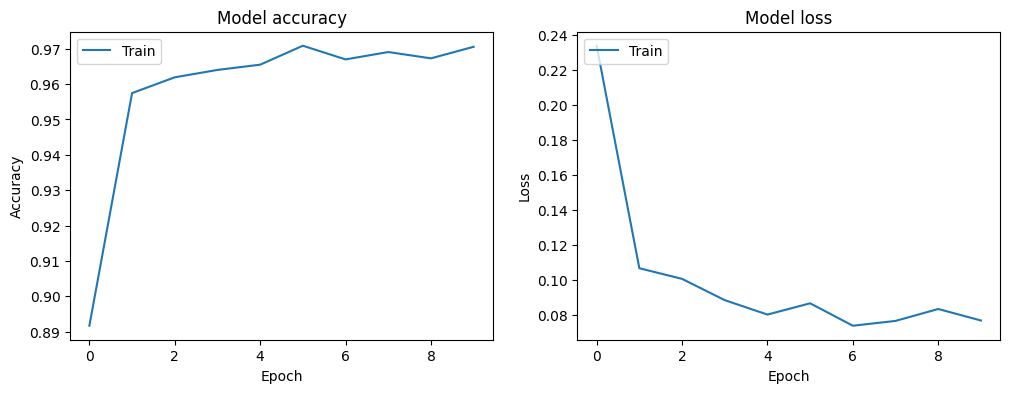

In [ ]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(classifier_nn.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(classifier_nn.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# KNN (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred=knn.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.38      0.79      0.51       282
           1       0.77      0.35      0.48       558

    accuracy                           0.50       840
   macro avg       0.58      0.57      0.50       840
weighted avg       0.64      0.50      0.49       840



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[224 364]
 [ 58 194]]


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       471
           1       1.00      0.68      0.81       369

    accuracy                           0.86       840
   macro avg       0.90      0.84      0.85       840
weighted avg       0.89      0.86      0.86       840



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[471 117]
 [  0 252]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       513
           1       1.00      0.77      0.87       327

    accuracy                           0.91       840
   macro avg       0.94      0.89      0.90       840
weighted avg       0.92      0.91      0.91       840



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[513  75]
 [  0 252]]


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=gnb.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       569
           1       1.00      0.93      0.96       271

    accuracy                           0.98       840
   macro avg       0.98      0.96      0.97       840
weighted avg       0.98      0.98      0.98       840



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[569  19]
 [  0 252]]


# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       588
           1       0.88      0.96      0.91       252

    accuracy                           0.95       840
   macro avg       0.93      0.95      0.94       840
weighted avg       0.95      0.95      0.95       840



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[554  34]
 [ 11 241]]


# 1D CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train = X_train.values
# y_train = y_train.values

# # Reshape the data to add a channel dimension (required for Conv1D)
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# # Convert labels to categorical if it's a classification problem
# y_train = to_categorical(y_train)

# Define the model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='softmax')  # Adjust based on number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history=model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


 49/105 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.2823 - loss: 0.3728

KeyboardInterrupt: 

In [ ]:
model

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()